In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

## Load Our Dataset

In [3]:
df = pd.read_csv('data/berat_tinggi.csv')
df.head(3)

,tinggi,berat,deskripsi
0,158.114332,58.364240,Normal
1,160.344026,52.560155,Normal
2,161.486080,61.934852,Normal


<AxesSubplot:xlabel='berat', ylabel='tinggi'>

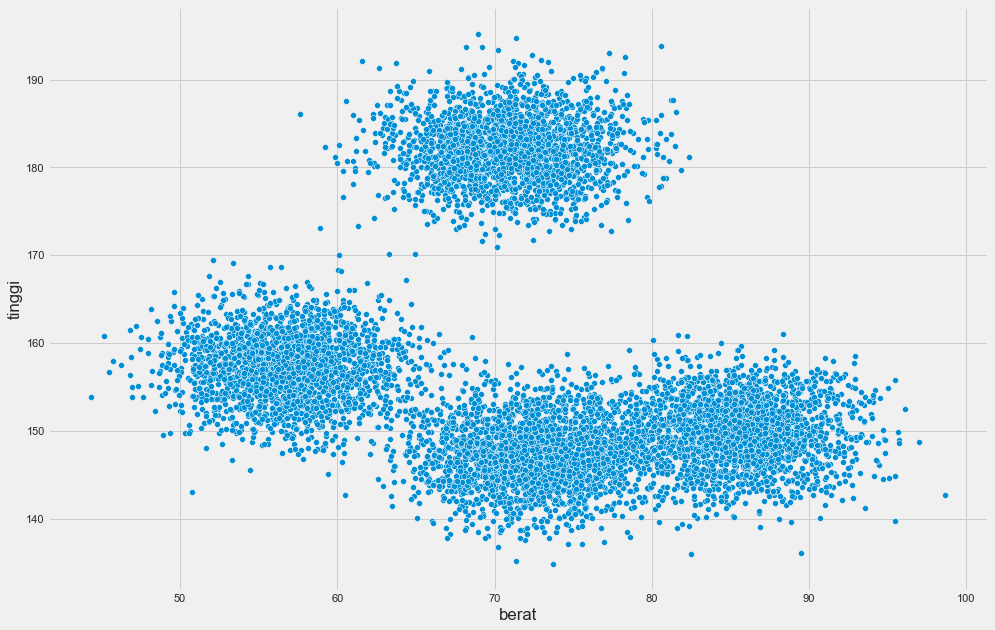

In [4]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='berat', y='tinggi')

## Standarisasi Fitur

In [5]:
feats = ['berat', 'tinggi']
X = df[feats].values
y = df['deskripsi'].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,berat,tinggi
count,8.888000e+03,8.888000e+03
mean,-9.445390e-16,-1.882882e-15
std,1.000056e+00,1.000056e+00
min,-2.518583e+00,-1.700451e+00
25%,-7.278008e-01,-7.436739e-01
50%,3.573103e-02,-3.731224e-01
75%,7.119833e-01,7.883579e-01
max,2.542716e+00,2.532521e+00


## Clustering

### Lakukan K-means

<AxesSubplot:>

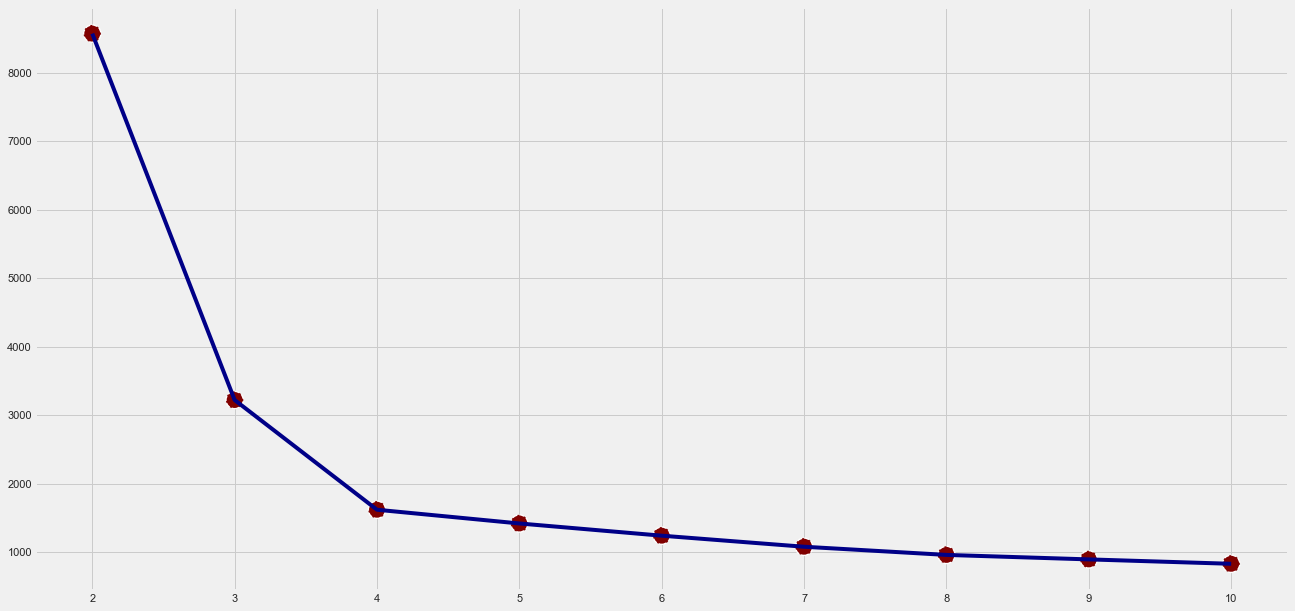

In [6]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(new_df.values)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')


In [7]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [8]:
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(new_df)
    preds = kmeans.predict(new_df)
     
    score_euclidean = silhouette_score(new_df, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

NameError: name 'arr_silhouette_score_mahalanobis' is not defined

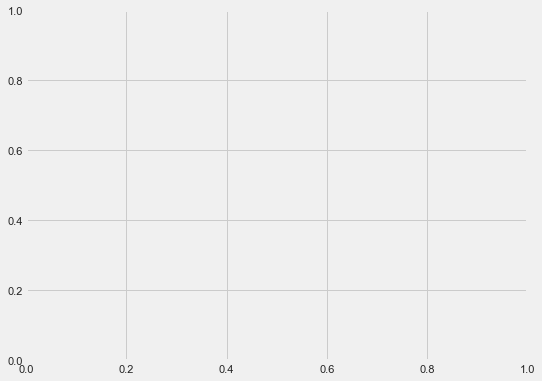

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_mahalanobis, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_mahalanobis, s=300, color='#800000',  linestyle='--')

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(new_df.values)

In [ ]:
df['target'] = y

In [ ]:

df['cluster'] = kmeans.labels_

In [ ]:
# fig, ax = plt.subplots(figsize=(15,10))
# sns.scatterplot(data=new_df, x='berat', y='tinggi', 
#                 hue='target')

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='berat', y='tinggi', 
                hue='cluster')

### Bandingkan hasil dengan target

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='berat', y='tinggi', 
                hue='target')